<a href="https://colab.research.google.com/github/micah-shull/Statistics/blob/main/Statistics_001_data_analysis_%26_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Introduction to Statistics**

#### **Why Are Statistics a Valuable Tool?**
1. **Foundation of Data Analysis**:
   - Statistics are the backbone of exploratory data analysis (EDA), providing clarity and direction before diving into advanced modeling techniques.
   
2. **Data-Driven Decision Making**:
   - Statistical methods ensure decisions are backed by rigorous, evidence-based analyses, reducing the risk of bias or error.
   
3. **Universal Applicability**:
   - From business to healthcare to technology, statistics play a critical role in solving real-world problems by transforming data into actionable insights.
   
4. **Bridging Exploration and Modeling**:
   - A thorough statistical understanding of a dataset lays the groundwork for building predictive models and conducting machine learning tasks.

Through a combination of descriptive statistics, visualizations, and inferential analyses, the notebook demonstrates how statistical methods can provide insights into the structure, relationships, and variability of data.








### Load Iris Data

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
# Convert to a DataFrame
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({i: name for i, name in enumerate(iris.target_names)})
iris_df['species'] = iris_df['species'].astype('category')
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


# Descriptive Statistics

#### **Why is This Information Valuable?**

1. **Basic Understanding of the Data**:
   - Quickly summarizes the central tendency (mean, median), spread (std, range), and extreme values (min, max).
   
2. **Spotting Anomalies**:
   - Outliers may be indicated by large differences between the mean and median or between the min/max and quartiles.

3. **Identifying Data Imbalance**:
   - Discrepancies in the count column reveal missing data or uneven sample sizes.

4. **Informing Visualizations**:
   - Guides decisions about which features to explore further with visualizations (e.g., focus on features with high variability).

5. **Comparing Features**:
   - Helps compare ranges and variability across features, ensuring they align with expectations.


### Data Distribution

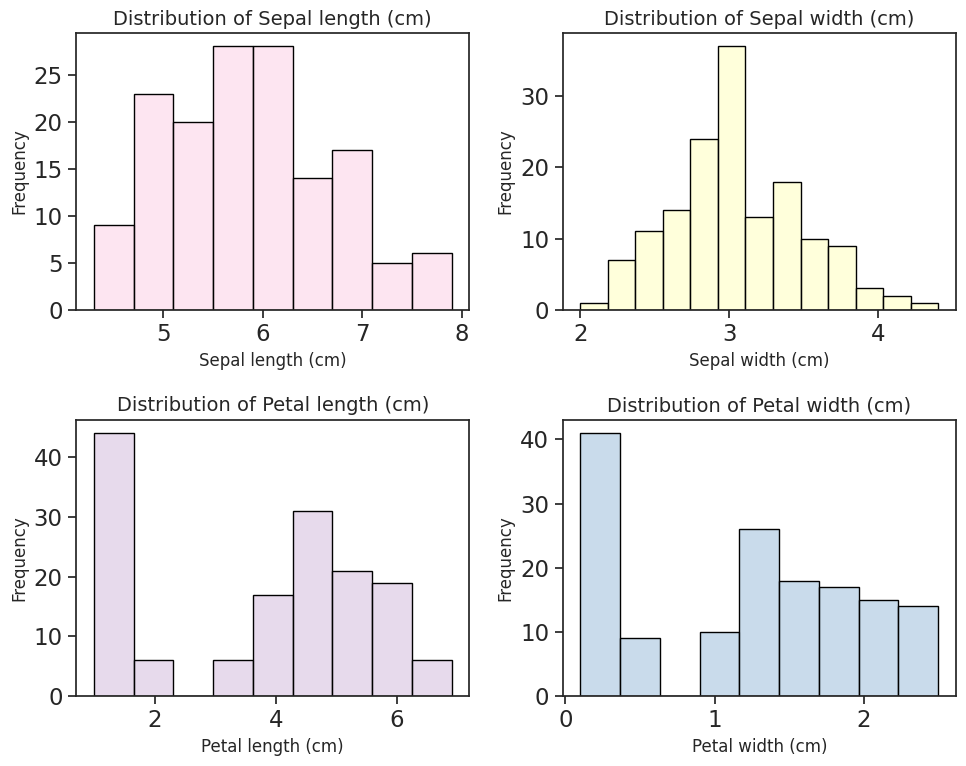

In [ ]:
# Set Seaborn theme, style, and palette
theme_style = "ticks"
palette_name = "Pastel1_r"
context_scale = "notebook"

sns.set_theme(style=theme_style, palette=palette_name)
sns.set_context(context_scale, font_scale=1.5, rc={"lines.linewidth": 2.5})

# Plot overall distributions for each feature
plt.figure(figsize=(10, 8))
for i, column in enumerate(iris.feature_names, 1):
    plt.subplot(2, 2, i)
    sns.histplot(
        data=iris_df,
        x=column,
        kde=False,
        color=sns.color_palette(palette_name, n_colors=4)[i - 1],
        edgecolor="k",
        alpha=0.7
    )
    plt.title(f"Distribution of {column.capitalize()}", fontsize=14)
    plt.xlabel(column.capitalize(), fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
iris_df.describe()


Descriptive Statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Mean & Standard Deviation

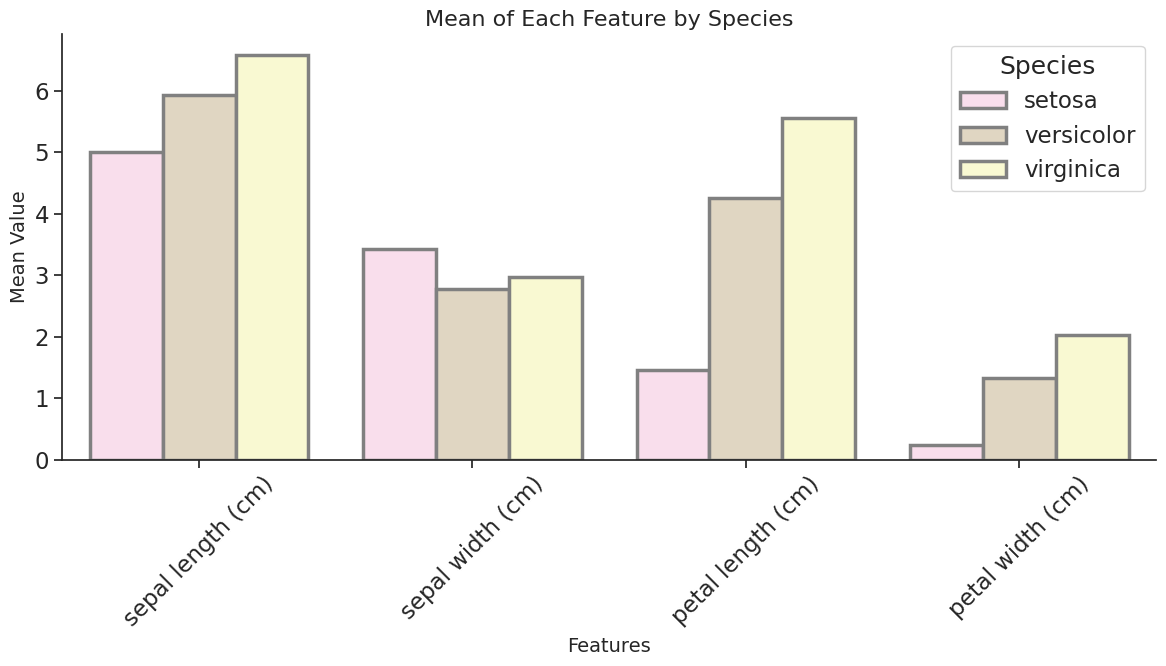

In [ ]:
# Calculate the mean of each feature grouped by species
grouped_means = iris_df.groupby('species', observed=True).mean().reset_index()

# Melt the DataFrame for easier plotting
melted_means = grouped_means.melt(id_vars='species', var_name='Feature', value_name='Mean')

# Plot the side-by-side barplot
plt.figure(figsize=(12, 7))
sns.barplot(
    data=melted_means,
    x='Feature',
    y='Mean',
    hue='species',
    linewidth=2.5, edgecolor=".5"
    # palette=palette_name
)

# Customize the plot
plt.title("Mean of Each Feature by Species", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Mean Value", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Species")
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


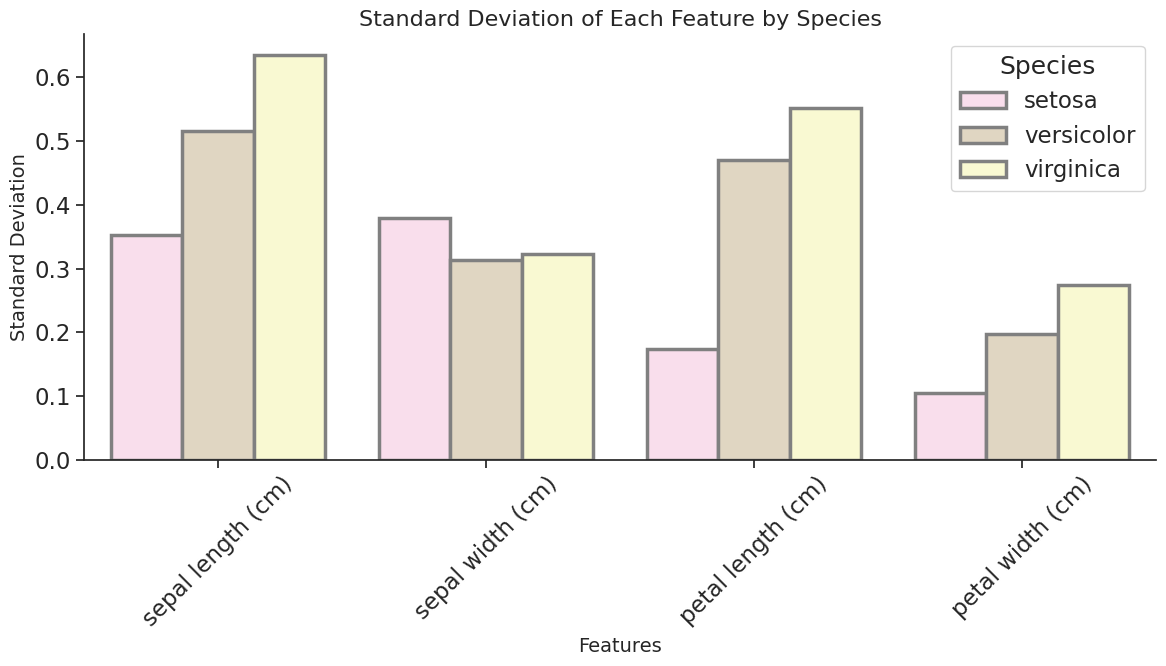

In [ ]:
# Calculate the standard deviation of each feature grouped by species
grouped_stds = iris_df.groupby('species', observed=True).std().reset_index()

# Melt the DataFrame for easier plotting
melted_stds = grouped_stds.melt(id_vars='species', var_name='Feature', value_name='Standard Deviation')

# Plot the side-by-side barplot
plt.figure(figsize=(12, 7))
sns.barplot(
    data=melted_stds,
    x='Feature',
    y='Standard Deviation',
    hue='species',
    linewidth=2.5, edgecolor=".5",
    # palette=palette_name
)

# Customize the plot
plt.title("Standard Deviation of Each Feature by Species", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Standard Deviation", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Species")
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

### **Boxplots**

#### **What is a Boxplot?**
A boxplot (or box-and-whisker plot) is a graphical representation of the distribution of a dataset, showing key summary statistics:
1. **Box**:
   - Represents the **interquartile range (IQR)**, which is the middle 50% of the data (from the 25th to the 75th percentile).
2. **Line Inside the Box**:
   - Marks the **median (50th percentile)**, showing the central tendency of the data.
3. **Whiskers**:
   - Extend from the box to the smallest and largest values within 1.5 times the IQR.
4. **Outliers**:
   - Points beyond the whiskers are plotted individually as potential outliers.

---

#### **What Does a Boxplot Represent?**
- **Spread**:
  - The IQR and whiskers show the variability in the dataset.
- **Symmetry**:
  - The position of the median relative to the box helps identify skewness.
- **Outliers**:
  - Identifies unusual observations that may need further investigation.

---

#### **Why Are Boxplots Important?**
1. **Summarize Distributions**:
   - Boxplots provide a concise summary of the dataset, showing its center, spread, and outliers.
   
2. **Compare Groups**:
   - They are particularly useful for comparing distributions across categories (e.g., sepal length across Iris species).

3. **Identify Skewness and Outliers**:
   - Quickly shows if the data is symmetric or skewed and highlights extreme values.

4. **Complement Descriptive Statistics**:
   - Visualizing statistics (e.g., median, quartiles) enhances understanding beyond numerical summaries.


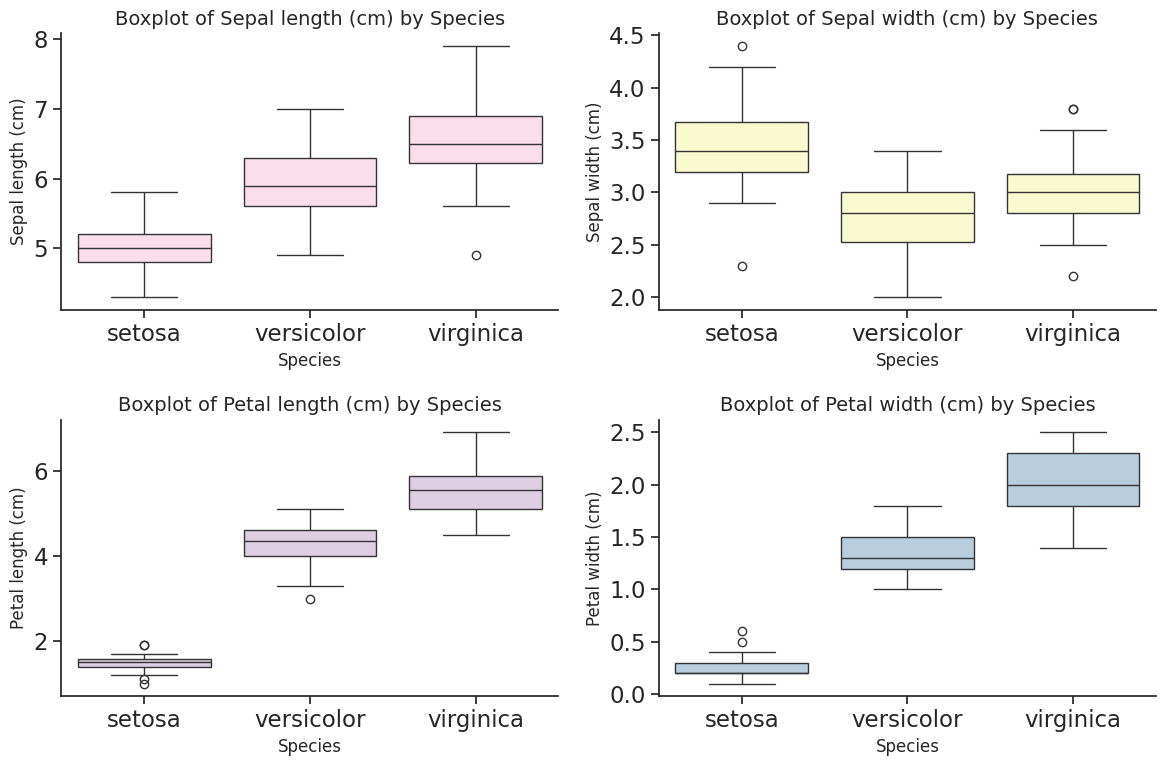

In [ ]:
# Boxplot for Each Feature by Species with Individual Colors
plt.figure(figsize=(12, 8))

# Iterate through features and create subplots
for i, column in enumerate(iris.feature_names, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(
        data=iris_df,
        x='species',
        y=column,
        color=sns.color_palette(palette_name, n_colors=4)[i - 1],  # Use specific color for each feature
        linecolor="0.1", linewidth=1,
        saturation=0.8
    )
    plt.title(f"Boxplot of {column.capitalize()} by Species", fontsize=14)
    plt.xlabel("Species", fontsize=12)
    plt.ylabel(column.capitalize(), fontsize=12)
    sns.despine()

# Adjust layout
plt.tight_layout()
plt.show()



### **Distribution (Density) Plots**

#### **What is a Distribution (Density) Plot?**
A distribution plot (often visualized as a density plot) shows the **probability density** of a dataset. It represents the shape of the data's distribution, providing a continuous estimate of where data points are most concentrated.

Key components:
- **Curve**:
  - Represents the estimated density of the data.
- **Shading**:
  - Highlights areas under the curve, providing visual context for the spread and concentration of the data.

---

#### **How Do Distribution Plots Relate to Boxplots?**
1. **Complementary Perspectives**:
   - A **boxplot** summarizes key aspects of the distribution (e.g., median, IQR, and outliers).
   - A **density plot** provides a detailed view of the distribution's shape, including peaks, tails, and symmetry.

2. **Shape vs. Summary**:
   - Density plots reveal details like multimodality (multiple peaks) or subtle asymmetries that may not be evident in boxplots.
   - Boxplots, on the other hand, highlight outliers and give a concise overview.

3. **Key Relationships**:
   - The **median in the boxplot** aligns with the central peak in the density plot.
   - The **IQR in the boxplot** corresponds to the middle 50% of data points under the density curve.
   - The **whiskers in the boxplot** reflect the data's spread, while density plots show this spread more fluidly.

---

#### **Why Are Distribution Plots Useful?**
1. **Visualize Data Shape**:
   - Identify whether the data is symmetric, skewed, or multimodal.
   
2. **Compare Groups**:
   - Overlaying density plots for different categories (e.g., species) reveals similarities or differences in their distributions.

3. **Interpret Data Behavior**:
   - Highlights patterns like clustering, gaps, or tails that influence statistical analyses.



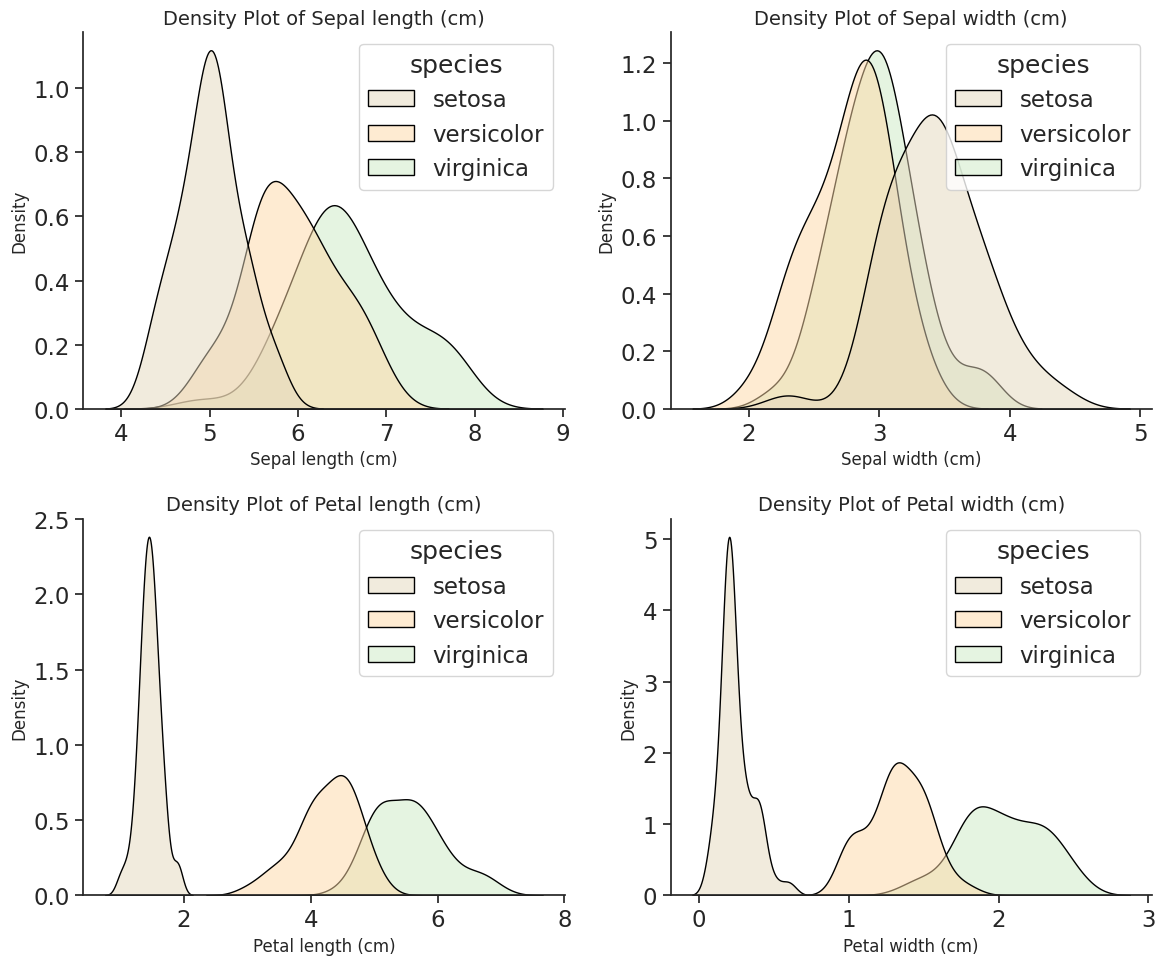

In [ ]:
# Define the features to plot
features = iris.feature_names

# Create a 2x2 grid of density plots
plt.figure(figsize=(12, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(
        data=iris_df,
        x=feature,
        hue="species",
        palette=sns.color_palette(palette_name, n_colors=len(iris_df['species'].unique())),
        fill=True,  # Add shading under the curves
        common_norm=False,  # Allow each species to have independent scaling
        alpha=0.5,
        ec='k', lw=1,
        legend=True  # Ensure legends are included
    )
    plt.title(f"Density Plot of {feature.capitalize()}", fontsize=14)
    plt.xlabel(feature.capitalize(), fontsize=12)
    plt.ylabel("Density", fontsize=12)
    sns.despine()

# Adjust layout
plt.tight_layout()
plt.show()


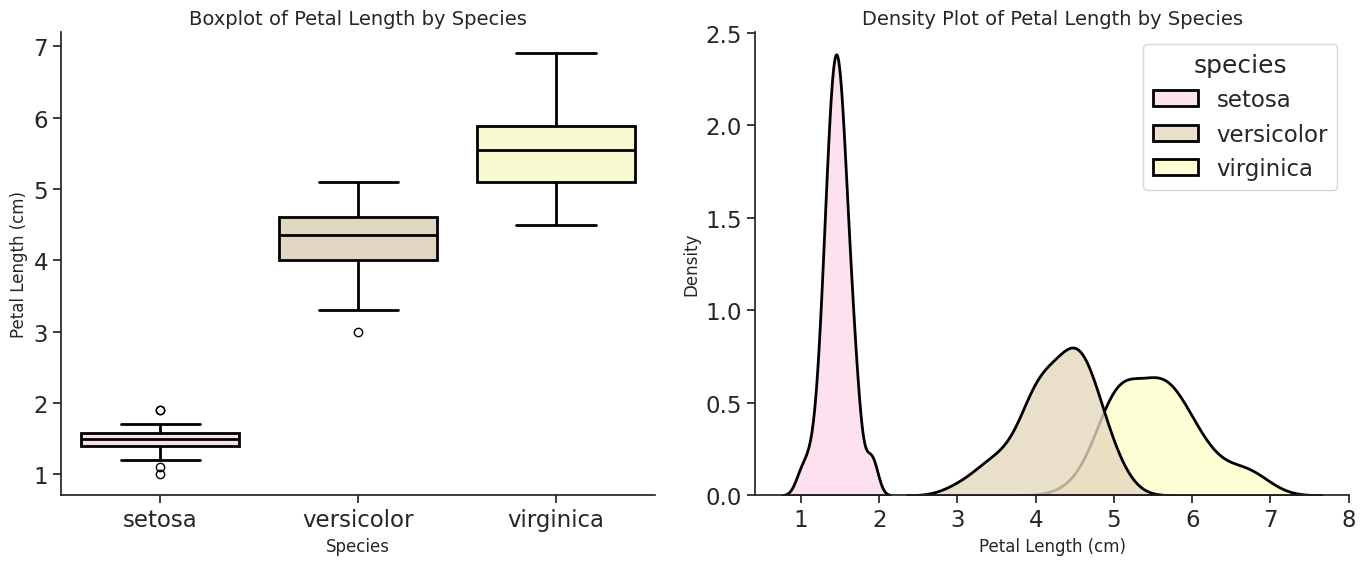

In [ ]:
plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(
    data=iris_df,
    x='species',
    y='petal length (cm)',
    hue='species',
    linecolor="k", linewidth=2
    # palette=palette_name
)
plt.title("Boxplot of Petal Length by Species", fontsize=14)
plt.xlabel("Species", fontsize=12)
plt.ylabel("Petal Length (cm)", fontsize=12)
sns.despine()

# Distribution Plot
plt.subplot(1, 2, 2)
sns.kdeplot(
    data=iris_df,
    x='petal length (cm)',
    hue='species',
    # palette=sns.color_palette(palette_name, n_colors=len(iris_df['species'].unique())),
    fill=True,
    common_norm=False,
    alpha=0.8,
    ec='k', lw=2
)
plt.title("Density Plot of Petal Length by Species", fontsize=14)
plt.xlabel("Petal Length (cm)", fontsize=12)
plt.ylabel("Density", fontsize=12)
sns.despine()

# Adjust layout
plt.tight_layout()
plt.show()


### Pairplot

#### **What is a Pairplot?**
A pairplot is a grid of scatterplots that visualizes pairwise relationships between numerical features in a dataset. It also includes histograms or density plots along the diagonal to show the distribution of individual features.

---

#### **Why is a Pairplot Useful?**
1. **Visualize Relationships**:
   - Shows how features interact, revealing patterns, clusters, or separations in the data.
   
2. **Spot Trends**:
   - Identifies linear or non-linear relationships between features.
   
3. **Compare Categories**:
   - Coloring by a categorical variable (e.g., species) highlights how groups differ.





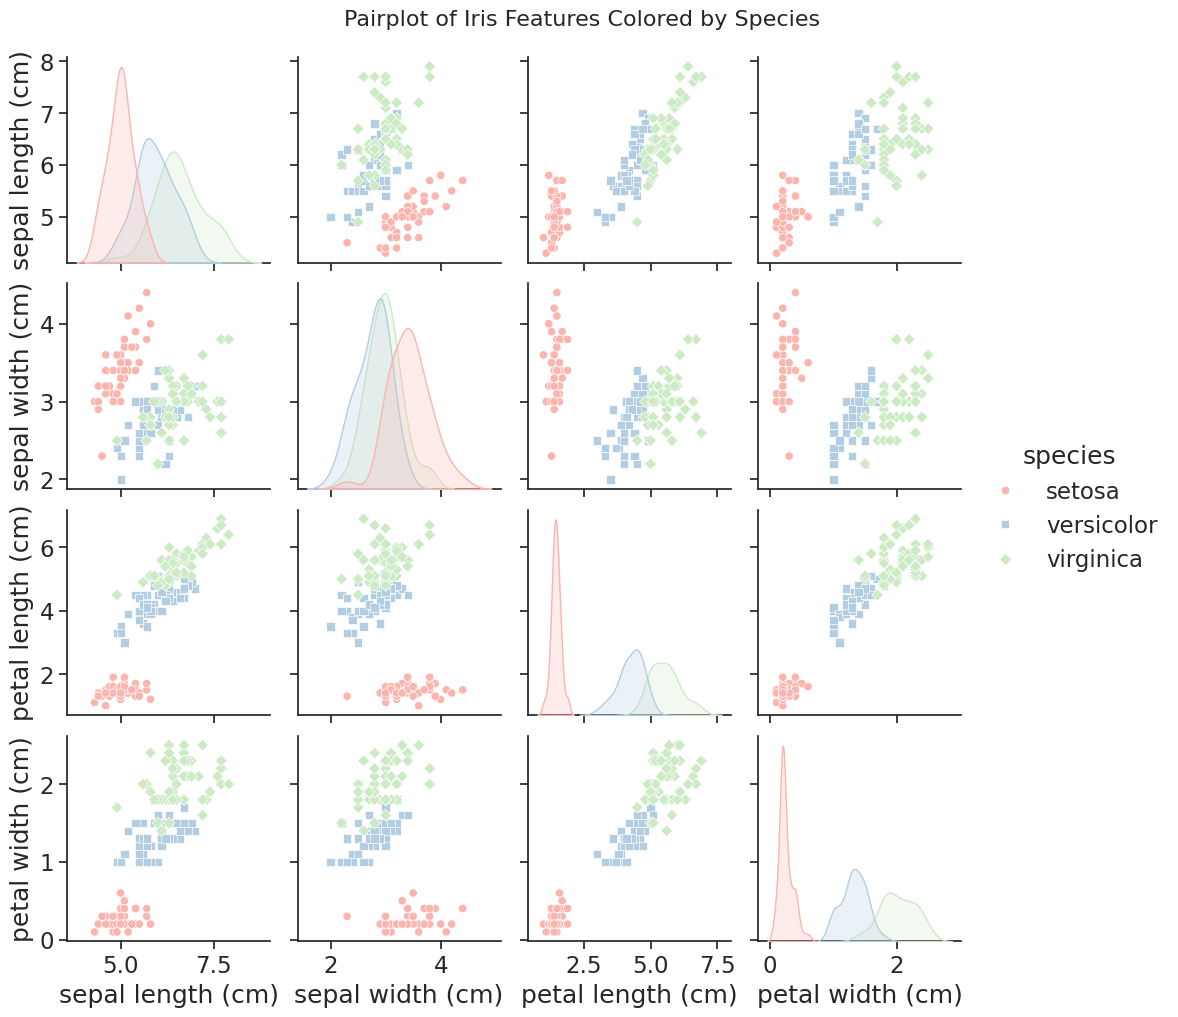

In [ ]:
# Create a pairplot colored by species
sns.pairplot(
    iris_df,
    hue="species",
    palette=sns.color_palette(palette_name, n_colors=len(iris_df['species'].unique())),
    diag_kind="kde",  # Use KDE for diagonal plots
    markers=["o", "s", "D"]
)

# Customize title
plt.suptitle("Pairplot of Iris Features Colored by Species", y=1.02, fontsize=16)
plt.show()


### **Correlation Matrix**

#### **What is a Correlation Matrix?**
A correlation matrix is a table showing the Pearson correlation coefficients between numerical features. The correlation coefficient (\( r \)) quantifies the strength and direction of a linear relationship between two variables:
- \( r = 1 \): Perfect positive correlation.
- \( r = -1 \): Perfect negative correlation.
- \( r = 0 \): No linear correlation.

---

#### **Why is the Correlation Matrix Important?**
1. **Understand Relationships**:
   - Identifies strongly correlated features that may be redundant.
   
2. **Feature Selection**:
   - Guides feature engineering by highlighting features with the most predictive power.
   
3. **Detect Multicollinearity**:
   - High correlations between independent variables can cause issues in regression models.

---

#### **Example in the Iris Dataset**
- Strong positive correlations between `petal length` and `petal width` indicate these features grow proportionally.
- Weak correlation between `sepal width` and other features suggests independence.

---

### **Pairplot vs. Correlation Matrix**
- The **pairplot** visually complements the **correlation matrix**, adding context to numeric correlations by showing actual data points and distributions.
- Together, they provide a comprehensive understanding of feature interactions, crucial for data exploration and modeling.

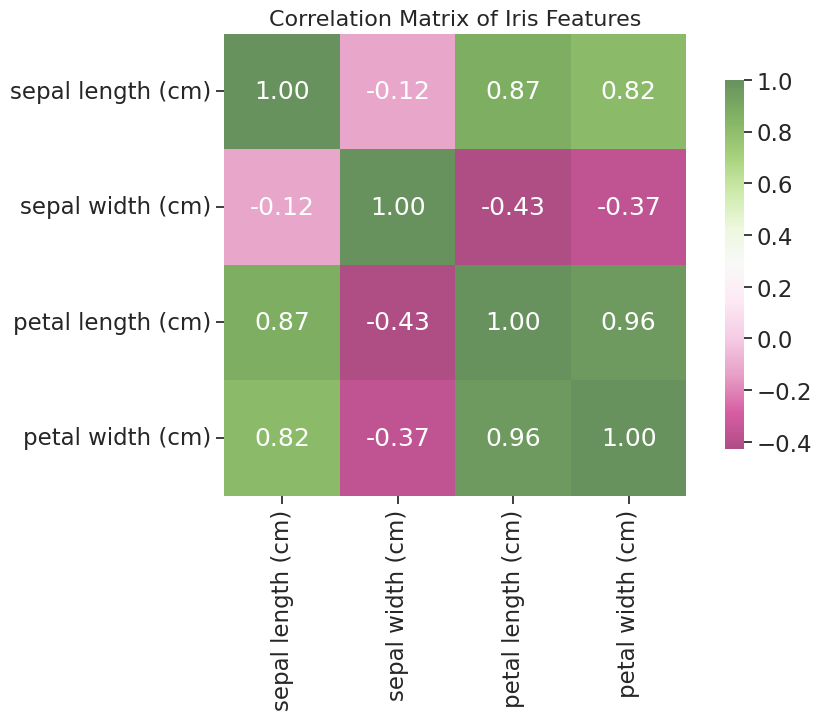

In [ ]:
# Compute the correlation matrix
correlation_matrix = iris_df[iris.feature_names].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="PiYG",
    alpha=0.7,
    fmt=".2f",
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix of Iris Features", fontsize=16)
plt.show()



### **Skewness and Kurtosis**

#### **What are Skewness and Kurtosis?**
- **Skewness** measures the asymmetry of a data distribution:
  - **Positive Skew (Right Skew)**: The tail is longer on the right side of the distribution.
  - **Negative Skew (Left Skew)**: The tail is longer on the left side.
  - **Interpretation**: A skewness of 0 indicates a perfectly symmetric distribution. Values close to 0 suggest near-normality.

- **Kurtosis** measures the "tailedness" or heaviness of the tails of the distribution:
  - **High Kurtosis (Leptokurtic)**: The distribution has heavy tails and sharp peaks (more outliers).
  - **Low Kurtosis (Platykurtic)**: The distribution has light tails and a flatter peak (fewer outliers).
  - **Interpretation**: A kurtosis of 3 is the reference value for a normal distribution. Deviations from 3 indicate the presence of heavy or light tails.

---

#### **Why are Skewness and Kurtosis Important?**
- Both metrics provide insights into the shape and characteristics of a distribution, which is crucial for statistical modeling.
- **Impact on Statistical Tests**:
  - Many statistical tests (e.g., t-tests, ANOVA) assume data is normally distributed. Skewness and kurtosis help assess these assumptions.
- **Detection of Outliers**:
  - High kurtosis often indicates a higher likelihood of outliers in the dataset.
- **Informing Data Transformation**:
  - Skewed data may require transformations (e.g., log or square root) to make it more suitable for analysis.

---

#### **How to Interpret the Results?**
- **Skewness**:
  - **Close to 0**: Distribution is symmetric.
  - **> 0**: Positively skewed (long right tail, concentration on the left).
  - **< 0**: Negatively skewed (long left tail, concentration on the right).
- **Kurtosis**:
  - **Close to 3**: Distribution resembles a normal distribution.
  - **> 3**: Heavy-tailed distribution (more extreme values).
  - **< 3**: Light-tailed distribution (fewer extreme values).



In [ ]:
from scipy.stats import skew, kurtosis

# Compute skewness and kurtosis for each feature
stats_summary = pd.DataFrame({
    "Feature": iris.feature_names,
    "Skewness": [skew(iris_df[col]) for col in iris.feature_names],
    "Kurtosis": [kurtosis(iris_df[col]) for col in iris.feature_names]
})
print("Skewness and Kurtosis of Iris Features:\n", stats_summary)


Skewness and Kurtosis of Iris Features:
              Feature  Skewness  Kurtosis
0  sepal length (cm)  0.311753 -0.573568
1   sepal width (cm)  0.315767  0.180976
2  petal length (cm) -0.272128 -1.395536
3   petal width (cm) -0.101934 -1.336067


#### **Interpretation of Results**

1. **Sepal Length (cm)**:
   - **Skewness (0.31)**: Slightly positively skewed, indicating a small right tail.
   - **Kurtosis (-0.57)**: Light-tailed distribution, less prone to outliers.

2. **Sepal Width (cm)**:
   - **Skewness (0.32)**: Slightly positively skewed, with a minor right tail.
   - **Kurtosis (0.18)**: Close to a normal distribution, with moderately light tails.

3. **Petal Length (cm)**:
   - **Skewness (-0.27)**: Slightly negatively skewed, indicating a small left tail.
   - **Kurtosis (-1.40)**: Noticeably light-tailed, with a flatter distribution and fewer outliers.

4. **Petal Width (cm)**:
   - **Skewness (-0.10)**: Nearly symmetric.
   - **Kurtosis (-1.34)**: Light-tailed, similar to petal length.

---

### **Overall Summary**
- All features show minimal skewness, meaning they are fairly symmetric.
- **Petal features** have noticeably light tails (low kurtosis), suggesting fewer extreme values compared to a normal distribution.
- **Sepal features** are closer to normality but still have light tails.

This indicates the Iris dataset is fairly well-behaved with no major asymmetry or extreme tails, making it suitable for many standard statistical methods.

### **Outlier Detection**

#### **What Are Outliers?**
Outliers are data points that lie significantly outside the range of most other values in a dataset. They can occur naturally or result from errors in data collection, measurement, or entry.

---

#### **Why Do We Look at Outliers?**
- **Identify Data Quality Issues**:
  - Outliers can indicate errors or anomalies, such as incorrect measurements or recording mistakes.
- **Understand Underlying Patterns**:
  - Some outliers are meaningful and represent rare or extreme cases that provide valuable insights (e.g., high-value customers, rare events).
- **Improve Model Accuracy**:
  - Many statistical models and algorithms (e.g., linear regression, clustering) are sensitive to outliers and can produce biased results if they are not addressed.

---

#### **Effect of Outliers on Statistics**
- **Measures of Central Tendency**:
  - Outliers can drastically skew the **mean**, making it less representative of the dataset.
  - The **median** is more robust and less affected by outliers.
- **Measures of Spread**:
  - Outliers inflate the **variance** and **standard deviation**, leading to an exaggerated sense of variability.
- **Visualizations**:
  - Outliers can distort visualizations like histograms and scatterplots, making patterns harder to identify.

---

#### **How to Handle Outliers**
1. **Investigate**:
   - Determine whether outliers are genuine or errors. Genuine outliers may hold valuable information.
2. **Transform or Normalize Data**:
   - Apply transformations (e.g., log, square root) to reduce the influence of outliers.
3. **Use Robust Methods**:
   - Use statistics like the median or interquartile range (IQR), which are less sensitive to extreme values.
4. **Remove or Flag**:
   - In some cases, removing or flagging outliers is appropriate, especially if they result from errors.




In [ ]:
from scipy.stats import zscore

# Calculate z-scores
z_scores = iris_df[iris.feature_names].apply(zscore)

# Flag rows with any feature's z-score > 3 as outliers
outliers = z_scores[(z_scores > 3).any(axis=1)]
print(f"Number of outliers: {len(outliers)}")
print(outliers)

Number of outliers: 1
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
15          -0.173674          3.090775          -1.283389          -1.05218


#### **Interpretation of Outlier Results**

1. **Number of Outliers**: Only 1 data point was identified as an outlier in the dataset, indicating that the Iris dataset is generally well-behaved with minimal extreme values.

2. **Outlier Details**:
   - **Row Index**: The outlier is at index 15.
   - **Sepal Width (3.09)**: The z-score is significantly high, indicating this value is far from the mean and drives the classification as an outlier.
   - **Other Features**:
     - Sepal length (-0.17), petal length (-1.28), and petal width (-1.05) have relatively small z-scores and are not extreme.

3. **Key Insight**:
   - The outlier is primarily due to an unusually high **sepal width**, with no significant anomalies in the other features.
   - This suggests that the observation might be a rare case or a potential error in measurement.

---

### **Impact and Next Steps**
- **Impact**: This outlier may skew summary statistics like the mean and standard deviation for **sepal width**. It's unlikely to affect other features significantly.
- **Next Steps**:
  - Investigate the observation further (e.g., verify its validity).
  - Consider using robust statistics or transformations for analyses involving sepal width.



### Feature Scaling (Standardization/Normalization)

#### **What is Standardization?**
Standardization (or Z-score normalization) is a data preprocessing technique that transforms numerical features to have:
- **Mean = 0**
- **Standard Deviation = 1**

This process rescales data to a standard normal distribution, making features directly comparable.

---

#### **What Does Standardization Do?**
1. **Removes Units**:
   - It eliminates the influence of differing measurement units (e.g., centimeters vs. kilograms), making all features dimensionless.
   
2. **Centers the Data**:
   - Centers data around 0, so features with large absolute values don’t dominate those with smaller values.

3. **Scales Variability**:
   - Ensures features have the same variance, avoiding bias in analyses or models that depend on magnitude differences.

---

#### **When and Why is Standardization Needed?**

1. **Machine Learning Algorithms**:
   - Many algorithms (e.g., k-means, principal component analysis, SVMs) are sensitive to feature magnitudes.
   - Standardization ensures that features with larger ranges don’t disproportionately influence the model.

2. **Distance-Based Methods**:
   - Algorithms like k-NN or clustering use distances between data points. Standardization ensures these distances are meaningful.

3. **Combining Features with Different Scales**:
   - If features are measured in different units (e.g., age vs. income), standardization ensures fair comparison.

4. **Statistical Analysis**:
   - Helps normalize data for parametric tests or dimensionality reduction techniques like PCA.

---

#### **When Standardization is Not Necessary**
1. **Tree-Based Models**:
   - Algorithms like decision trees, random forests, and gradient boosting are scale-invariant and don’t require standardization.
   
2. **When Features are Already Normalized**:
   - If all features are naturally on a similar scale (e.g., percentages), standardization might not add value.




In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(iris_df[iris.feature_names])

# Convert back to a DataFrame for easier interpretation
scaled_df = pd.DataFrame(scaled_features, columns=iris.feature_names)
print("First five rows of standardized features:\n", scaled_df.head())


First five rows of standardized features:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


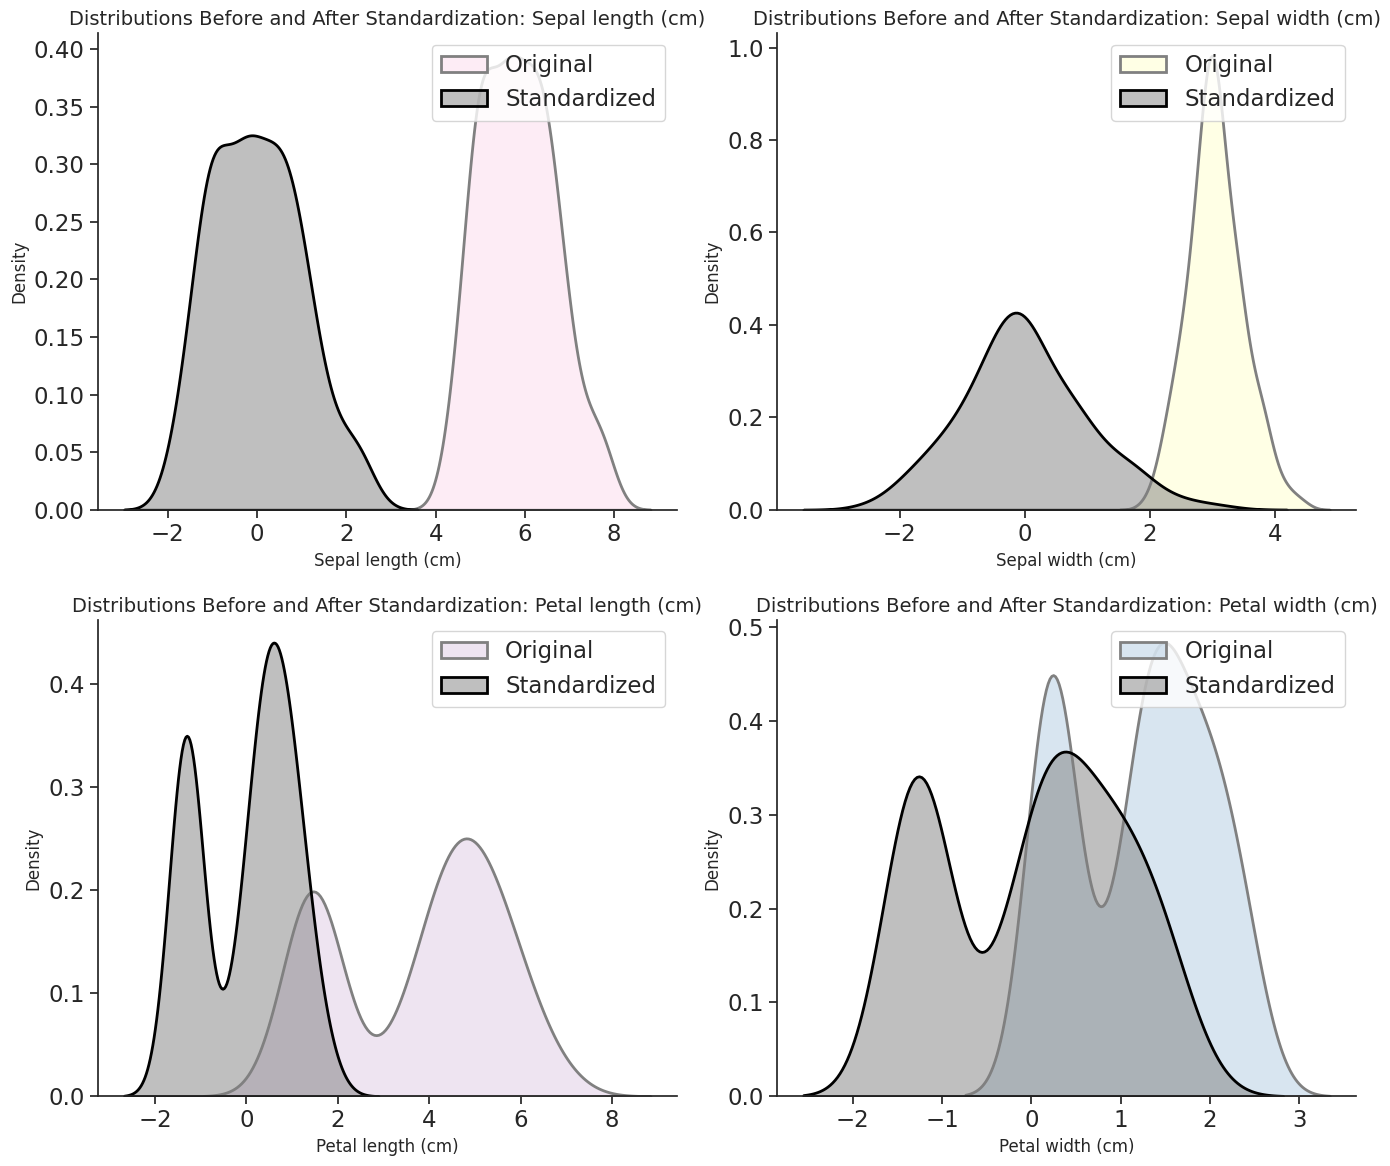

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(iris_df[iris.feature_names])

# Convert standardized data back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=iris.feature_names)

# Set Seaborn theme, style, and palette
theme_style = "ticks"
palette_name = "Pastel1_r"
context_scale = "notebook"

sns.set_theme(style=theme_style, palette=palette_name)
sns.set_context(context_scale, font_scale=1.5, rc={"lines.linewidth": 2.5})

# Plot distributions before and after standardization
plt.figure(figsize=(14, 12))
for i, column in enumerate(iris.feature_names, 1):
    plt.subplot(2, 2, i)

    # Plot original data
    sns.kdeplot(
        data=iris_df,
        x=column,
        fill=True,
        alpha=0.5,
        label="Original",
        color=sns.color_palette(palette_name, n_colors=4)[i - 1],
        ec='0.5', lw=2
    )

    # Plot standardized data
    sns.kdeplot(
        data=scaled_df,
        x=column,
        fill=True,
        alpha=0.5,
        label="Standardized",
        color="gray",
        ec='k', lw=2
    )

    # Customize plot
    plt.title(f"Distributions Before and After Standardization: {column.capitalize()}", fontsize=14)
    plt.xlabel(column.capitalize(), fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend(loc="upper right")
    sns.despine()

# Adjust layout
plt.tight_layout()
plt.show()


### Basic Probability Analysis

#### **What is Basic Probability Analysis?**
Basic probability analysis involves calculating the likelihood of events or outcomes in a dataset. It is the foundation of statistical inference, enabling us to make data-driven predictions and decisions under uncertainty.

---

#### **Why is Probability Analysis Important?**
1. **Foundation of Inferential Statistics**:
   - Probability underpins hypothesis testing, confidence intervals, and predictive modeling.

2. **Understand Relationships in Data**:
   - Helps quantify the relationships between events (e.g., conditional probability of a species given a feature value).

3. **Modeling Uncertainty**:
   - Many real-world scenarios involve uncertainty. Probability provides a mathematical framework to model and reason about it.

4. **Bayesian Thinking**:
   - Probability is essential for Bayesian methods, where prior knowledge is updated with new evidence.

5. **Risk Assessment**:
   - Useful in applications like fraud detection, medical diagnostics, and financial modeling, where probabilities indicate the likelihood of critical outcomes.

---

#### **How Do We Use Probability Analysis?**
1. **Marginal Probability**:
   - Probability of a single event occurring, e.g., \( P(\text{species} = \text{'setosa'}) \).

2. **Conditional Probability**:
   - Probability of an event given another, e.g., \( P(\text{species} = \text{'setosa'} | \text{petal length} < 2) \).

3. **Joint Probability**:
   - Probability of two events occurring together, e.g., \( P(\text{species} = \text{'setosa'} \, \text{and} \, \text{petal length} < 2) \).

4. **Bayes’ Theorem**:
   - Combines conditional and marginal probabilities to update beliefs with evidence:
     \[
     P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
     \]

---

#### **Impact on the Notebook**
- In the Iris dataset:
  - You might calculate probabilities to better understand relationships between species and features.
  - For example, "What is the probability that a flower belongs to `setosa` given its petal length is less than 2?"
  - Such analysis highlights patterns and provides insights into the dataset's structure, bridging descriptive statistics and predictive modeling.



In [ ]:
# Example: Probability of 'setosa' given petal length < 2
subset = iris_df[iris_df['petal length (cm)'] < 2]
prob_setosa = (subset['species'] == 'setosa').mean()
print(f"Probability of 'setosa' given petal length < 2: {prob_setosa:.2f}")


Probability of 'setosa' given petal length < 2: 1.00


In [ ]:
# Marginal Probability: Probability of each species
species_counts = iris_df['species'].value_counts(normalize=True)
print("Marginal Probabilities (P(species)):")
print(species_counts)

# Conditional Probability: P(species = 'setosa' | petal length < 2)
subset = iris_df[iris_df['petal length (cm)'] < 2]
conditional_prob = (subset['species'] == 'setosa').mean()
print(f"\nConditional Probability (P(setosa | petal length < 2)): {conditional_prob:.2f}")

# Joint Probability: P(species = 'setosa' and petal length < 2)
joint_prob = (iris_df['species'] == 'setosa').mean() * conditional_prob
print(f"\nJoint Probability (P(setosa and petal length < 2)): {joint_prob:.2f}")

# Custom Query: Probability of species given petal width >= 1
query_condition = iris_df['petal width (cm)'] >= 1
conditional_probs_by_species = iris_df[query_condition]['species'].value_counts(normalize=True)
print("\nConditional Probabilities (P(species | petal width >= 1)):")
print(conditional_probs_by_species)

Marginal Probabilities (P(species)):
species
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64

Conditional Probability (P(setosa | petal length < 2)): 1.00

Joint Probability (P(setosa and petal length < 2)): 0.33

Conditional Probabilities (P(species | petal width >= 1)):
species
versicolor    0.5
virginica     0.5
setosa        0.0
Name: proportion, dtype: float64


### Confidence Intervals

#### **What is a Confidence Interval (CI)?**
A confidence interval is a range of values, derived from a sample, that is likely to contain the true population parameter (e.g., mean, proportion) with a specified level of confidence.

For example:
- A 95% confidence interval means that if we were to take 100 different samples and compute a CI for each, about 95 of those intervals would contain the true population mean.

---

#### **Why Are Confidence Intervals Important?**
1. **Quantify Uncertainty**:
   - CIs give a range instead of a single estimate, showing the reliability of a statistic.
   
2. **Support Decision-Making**:
   - A narrow CI indicates precise estimates, while a wide CI suggests more uncertainty.
   
3. **Compare Groups**:
   - Overlapping CIs can indicate that two groups may not differ significantly.
   
4. **Infer Population Parameters**:
   - Allows us to make inferences about the population from sample data.

5. **Key Components**:
   - **Confidence Level**: The proportion of intervals expected to contain the true value (e.g., 95%, 99%).
   - **Margin of Error**: The amount added/subtracted from the mean to calculate the interval width.

---

#### **Interpreting Confidence Intervals**
- **Narrow Interval**:
  - Suggests high precision and less variability in the estimate.
- **Wide Interval**:
  - Indicates higher uncertainty and variability.
- **Does Not Guarantee**:
  - A 95% CI does not mean the true value has a 95% probability of being in the interval. Instead, it reflects the confidence of the method.






In [ ]:
from scipy.stats import t

# Example: 95% confidence interval for the mean of each feature
confidence_intervals = {}
for col in iris.feature_names:
    mean = iris_df[col].mean()
    std_err = iris_df[col].std() / np.sqrt(len(iris_df[col]))
    ci = t.interval(0.95, len(iris_df[col]) - 1, loc=mean, scale=std_err)
    confidence_intervals[col] = ci

print("95% Confidence Intervals:")
for feature, ci in confidence_intervals.items():
    print(f"{feature}: {ci}")


95% Confidence Intervals:
sepal length (cm): (5.709732481507366, 5.976934185159301)
sepal width (cm): (2.9870103180785432, 3.127656348588124)
petal length (cm): (3.473185370199511, 4.04281462980049)
petal width (cm): (1.0763532977706853, 1.3223133688959818)


### Pairwise Feature Comparisons (Hypothesis Testing)

#### **What is Hypothesis Testing?**
Hypothesis testing is a statistical method to assess whether a specific claim (hypothesis) about a population parameter is supported by sample data.

---

#### **Why Is It Important?**
1. **Compare Groups**:
   - Test whether features (e.g., means of sepal lengths) differ significantly between species.
   
2. **Evaluate Relationships**:
   - Assess if features are correlated or independent.
   
3. **Validate Assumptions**:
   - Hypothesis tests validate assumptions used in modeling (e.g., normality, equal variances).

---

#### **Key Concepts in Hypothesis Testing**
1. **Null Hypothesis (\(H_0\))**:
   - Default assumption (e.g., no difference between groups or no relationship between variables).

2. **Alternative Hypothesis (\(H_1\))**:
   - Opposes \(H_0\) (e.g., a difference exists between groups).

3. **P-Value**:
   - Probability of observing data as extreme as the sample if \(H_0\) is true.
   - **Interpretation**:
     - \(p \leq 0.05\): Reject \(H_0\) (significant result).
     - \(p > 0.05\): Fail to reject \(H_0\) (insufficient evidence).

4. **Test Statistic**:
   - Quantifies the difference or relationship (e.g., t-statistic for t-tests, F-statistic for ANOVA).

---

#### **Common Hypothesis Tests for Pairwise Comparisons**
1. **T-Test**:
   - Compares the means of two groups.
   - Assumes normal distribution and similar variances.
   - Variants:
     - **Independent t-test**: Compares two independent groups.
     - **Paired t-test**: Compares related groups (e.g., pre/post data).

2. **ANOVA (Analysis of Variance)**:
   - Compares means across more than two groups.
   - Assumes normal distribution and equal variances.
   - Followed by post-hoc tests (e.g., Tukey's HSD) for pairwise group comparisons.

3. **Non-Parametric Tests**:
   - Used when data doesn't meet parametric assumptions (e.g., Mann-Whitney U, Kruskal-Wallis).

---

#### **How to Use in the Iris Dataset**
- **Goal**: Compare features across species to identify significant differences.
- **Example**: Are sepal lengths significantly different between `setosa` and `versicolor`?



T-Test for Sepal Length (Setosa vs. Versicolor): t-stat = -10.52, p-value = 0.0000

ANOVA for Sepal Length Across Species: F-stat = 119.26, p-value = 0.0000

The difference in sepal lengths between groups is statistically significant.


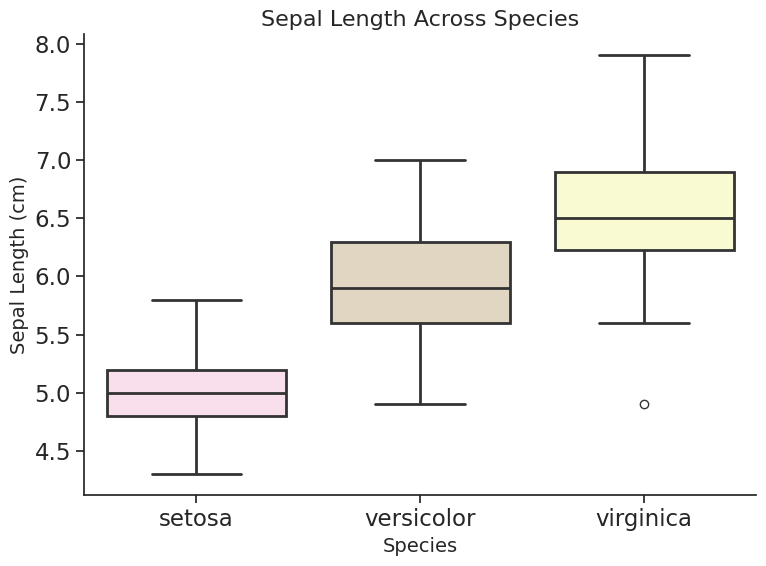

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# T-Test: Compare sepal lengths between 'setosa' and 'versicolor'
setosa_sepal_length = iris_df[iris_df['species'] == 'setosa']['sepal length (cm)']
versicolor_sepal_length = iris_df[iris_df['species'] == 'versicolor']['sepal length (cm)']

t_stat, p_value = ttest_ind(setosa_sepal_length, versicolor_sepal_length)
print(f"T-Test for Sepal Length (Setosa vs. Versicolor): t-stat = {t_stat:.2f}, p-value = {p_value:.4f}")

# ANOVA: Compare sepal lengths across all species
setosa = iris_df[iris_df['species'] == 'setosa']['sepal length (cm)']
versicolor = iris_df[iris_df['species'] == 'versicolor']['sepal length (cm)']
virginica = iris_df[iris_df['species'] == 'virginica']['sepal length (cm)']

f_stat, p_value = f_oneway(setosa, versicolor, virginica)
print(f"\nANOVA for Sepal Length Across Species: F-stat = {f_stat:.2f}, p-value = {p_value:.4f}")

# Interpretations
if p_value <= 0.05:
    print("\nThe difference in sepal lengths between groups is statistically significant.")
else:
    print("\nNo statistically significant difference in sepal lengths between groups.")

# Visualize Pairwise Comparisons
plt.figure(figsize=(8, 6))
sns.boxplot(data=iris_df, x='species', y='sepal length (cm)', hue='species',
            linecolor='0.2', linewidth=2)
plt.title("Sepal Length Across Species", fontsize=16)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Sepal Length (cm)", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()
